In [1]:
#improting necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from ydata_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from scipy.stats import randint
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, precision_score
from lazypredict.Supervised import LazyClassifier

ModuleNotFoundError: No module named 'xgboost'

In [2]:

df = pd.read_csv('E:/Python/AI/Project/Practice ML Project/Heart Disease/heart_statlog_cleveland_hungary_final.csv')

In [3]:
df.head(10)

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   
5   39    1                3           120          339                    0   
6   45    0                2           130          237                    0   
7   54    1                2           110          208                    0   
8   37    1                4           140          207                    0   
9   48    0                2           120          284                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
5            0             170                0      0.0         1       0  
6            0             170                0      0.0         1       0  
7            0             142                0      0.0         1       0  
8            0             130                1      1.5         2       1  
9            0             120                0      0.0         1       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
df.describe()

age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359       25.517636         0.487360   
min               0.000000     0.000000       60.000000         0.000000   
25%               0.000000     0.000000      121.000000         0.000000   
50%               0.000000     0.000000      140.500000         0.000000   
75%               0.000000     2.000000      160.000000         1.000000   
max               1.000000     2.000000      202.000000         1.000000   

           oldpeak     ST slope       target  
count  1190.000000  1190.000000  1190.000000  
mean      0.922773     1.624370     0.528571  
std       1.086337     0.610459     0.499393  
min      -2.600000     0.000000     0.000000  
25%       0.000000     1.000000     0.000000  
50%       0.600000     2.000000     1.000000  
75%       1.600000     2.000000     1.000000  
max       6.200000     3.000000     1.000000

In [6]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [7]:
df.duplicated().sum()

272

<Axes: >

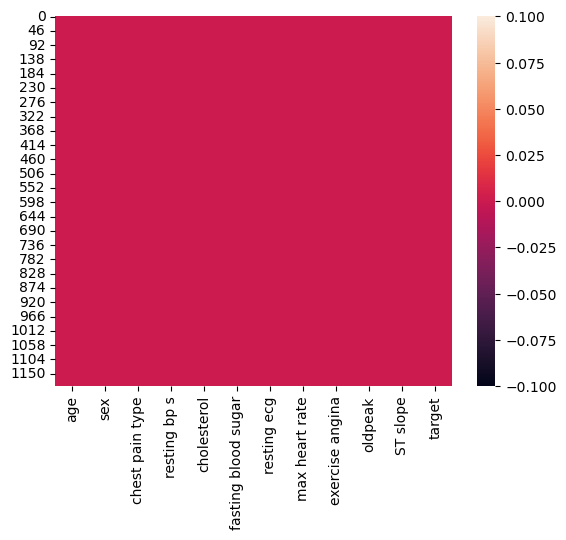

In [8]:
sns.heatmap(df.isna(), cbar = True)

<Axes: >

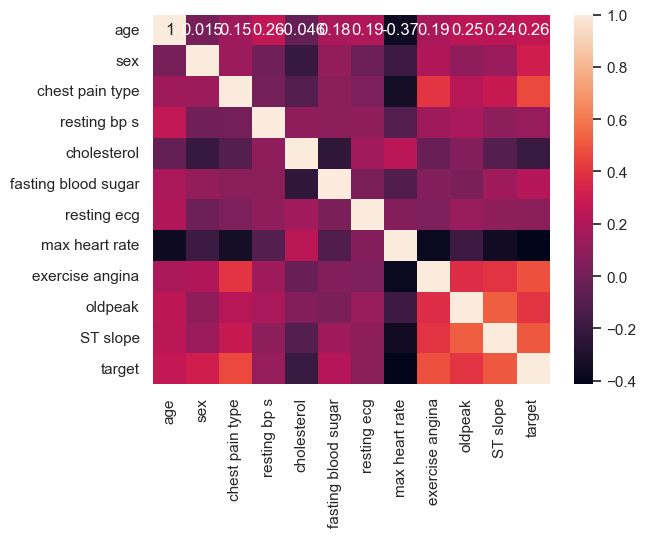

In [80]:
#visualizing the correlation between the features
sns.heatmap(df.corr(), cbar = True, annot=True)

In [10]:
profile = ProfileReport(df, title = 'Data Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='target', ylabel='count'>

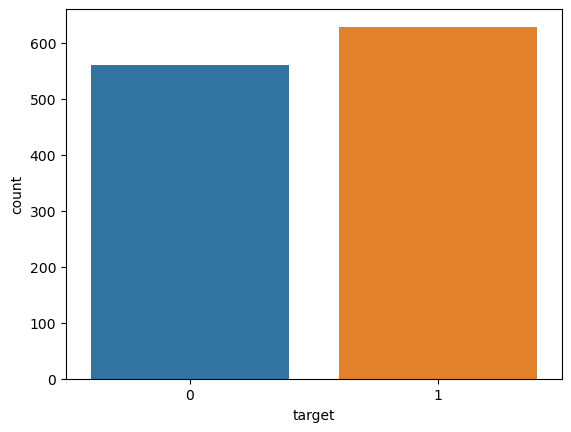

In [12]:
sns.countplot(df, x = 'target')

c:\Users\sajib\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sajib\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='target'>

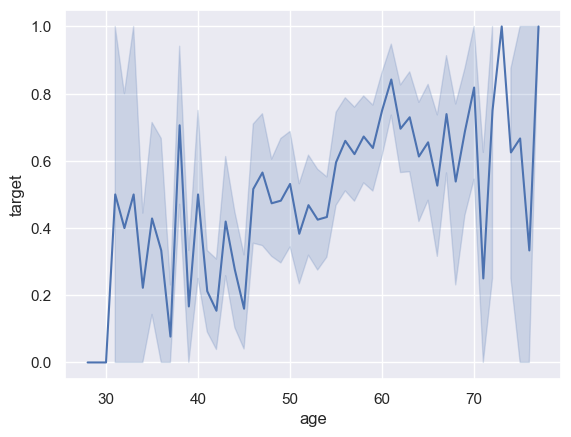

In [23]:
sns.set_theme(style="darkgrid")
sns.lineplot(data = df, x='age', y='target')

c:\Users\sajib\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


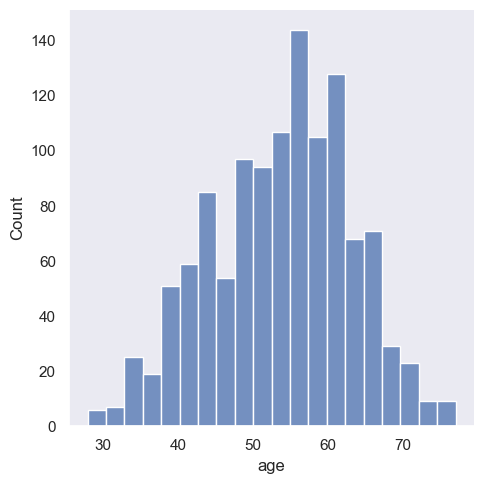

In [22]:
sns.displot(data = df, x = 'age')

c:\Users\sajib\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sajib\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sajib\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sajib\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

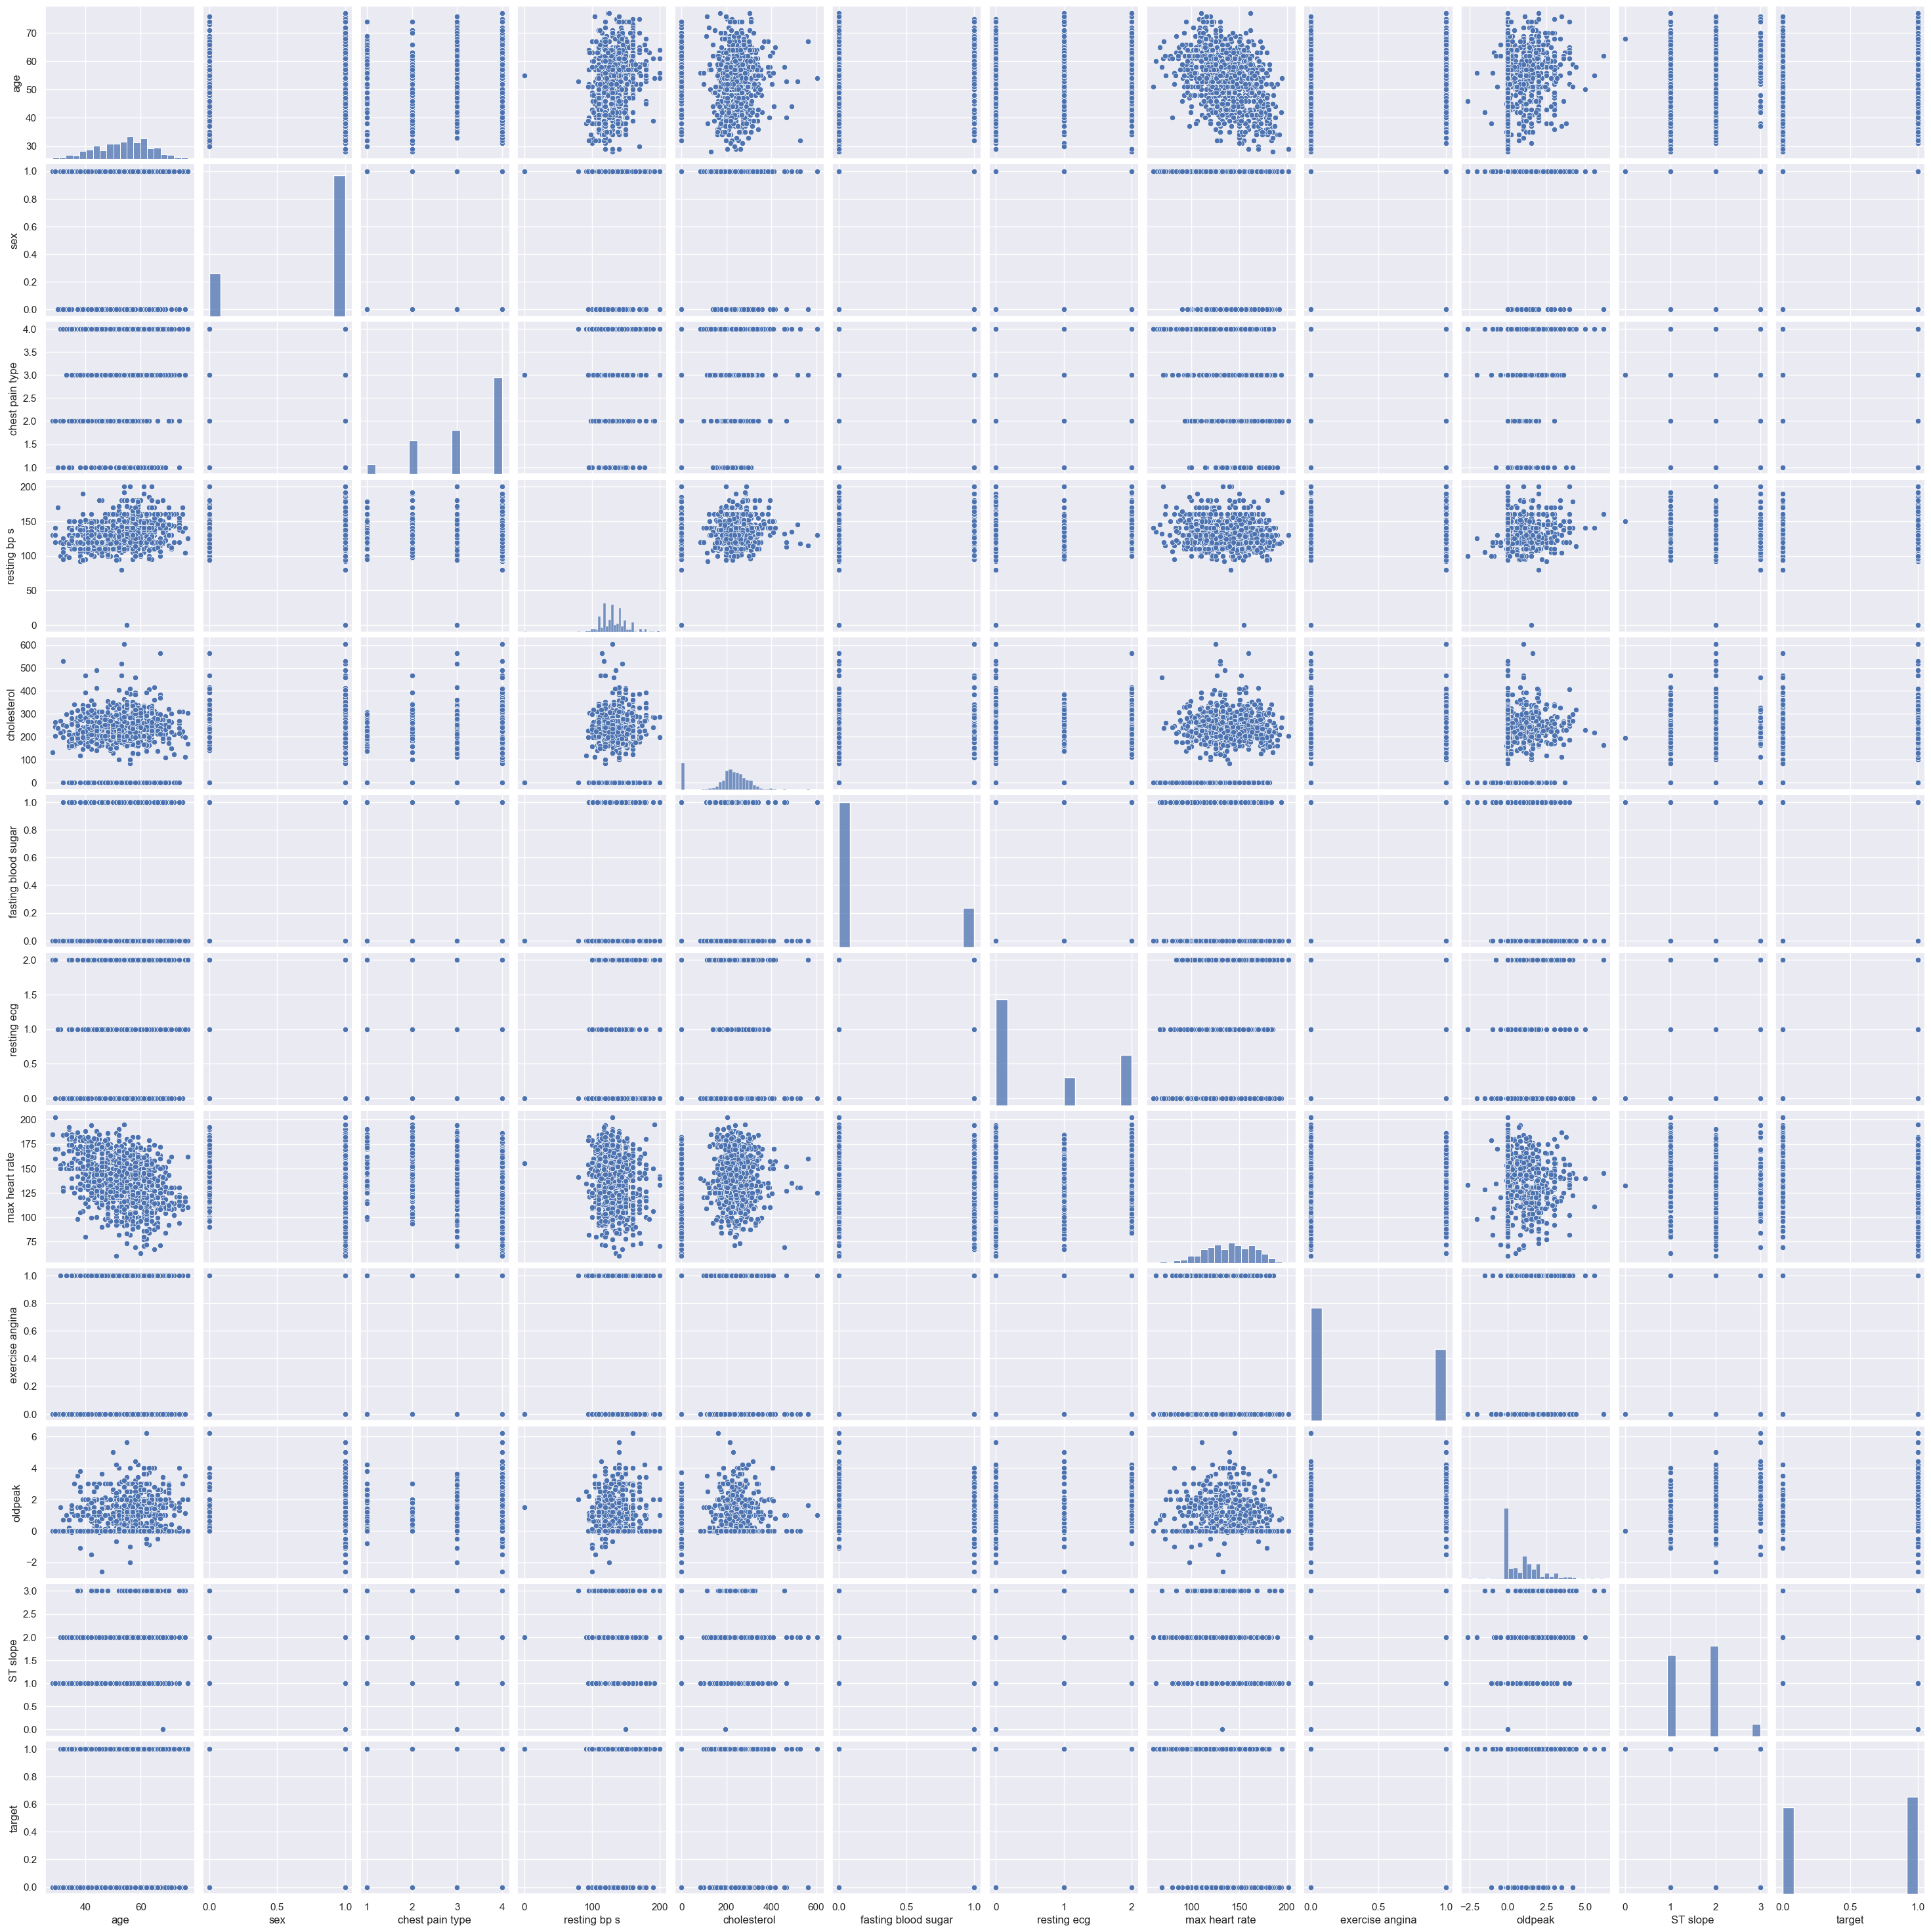

In [25]:
sns.pairplot(df)

In [30]:
x = df.iloc[:, :-1]
x.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  
0            0             172                0      0.0         1  
1            0             156                0      1.0         2  
2            1              98                0      0.0         1  
3            0             108                1      1.5         2  
4            0             122                0      0.0         1

In [29]:
y = df.iloc[:,-1]
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64

In [72]:
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [40]:
x.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  
0            0             172                0      0.0         1  
1            0             156                0      1.0         2  
2            1              98                0      0.0         1  
3            0             108                1      1.5         2  
4            0             122                0      0.0         1

In [73]:
x = scaler.transform(x)

In [45]:
x

array([[0.24489796, 1.        , 0.33333333, ..., 0.        , 0.29545455,
        0.33333333],
       [0.42857143, 0.        , 0.66666667, ..., 0.        , 0.40909091,
        0.66666667],
       [0.18367347, 1.        , 0.33333333, ..., 0.        , 0.29545455,
        0.33333333],
       ...,
       [0.59183673, 1.        , 1.        , ..., 1.        , 0.43181818,
        0.66666667],
       [0.59183673, 0.        , 0.33333333, ..., 0.        , 0.29545455,
        0.66666667],
       [0.20408163, 1.        , 0.66666667, ..., 0.        , 0.29545455,
        0.33333333]])

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [60]:
x= df.iloc[:, :-1]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [62]:
x

age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0            1              98                0   
3                       0            0             108                1   
4                       0            0             122                0   
...                   ...          ...             ...              ...   
1185                    0            0             132                0   
1186                    1            0             141                0   
1187                    0            0             115                1   
1188                    0            2             174                0   
1189                    0            0             173                0   

      oldpeak  ST slope  
0         0.0         1  
1         1.0         2  
2         0.0         1  
3         1.5         2  
4         0.0         1  
...       ...       ...  
1185      1.2         2  
1186      3.4         2  
1187      1.2         2  
1188      0.0         2  
1189      0.0         1  

[1190 rows x 11 columns]

In [57]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('XGBoost', xgb.XGBClassifier())
]

for model_name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    recall = recall_score(y_test, predictions, average='weighted')  
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=1) 
    
    print(f"Model: {model_name}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print("-" * 50)

Model: Logistic Regression
Recall: 0.8907563025210085
Accuracy: 0.8907563025210085
Precision: 0.8955199760730929
--------------------------------------------------
Model: Decision Tree
Recall: 0.9159663865546218
Accuracy: 0.9159663865546218
Precision: 0.9220490940801706
--------------------------------------------------
Model: Random Forest
Recall: 0.9495798319327731
Accuracy: 0.9495798319327731
Precision: 0.9523809523809523
--------------------------------------------------
Model: SVM
Recall: 0.9411764705882353
Accuracy: 0.9411764705882353
Precision: 0.9415216790941728
--------------------------------------------------
Model: KNN
Recall: 0.8991596638655462
Accuracy: 0.8991596638655462
Precision: 0.9054297533764792
--------------------------------------------------
Model: Gradient Boosting
Recall: 0.9495798319327731
Accuracy: 0.9495798319327731
Precision: 0.9504716172183159
--------------------------------------------------
Model: AdaBoost
Recall: 0.8739495798319328
Accuracy: 0.8739495

In [75]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('XGBoost', xgb.XGBClassifier())
]

for model_name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    recall = recall_score(y_test, predictions, average='weighted')  
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=1) 
    
    print(f"Model: {model_name}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print("-" * 50)

Model: Logistic Regression
Recall: 0.8907563025210085
Accuracy: 0.8907563025210085
Precision: 0.8955199760730929
--------------------------------------------------
Model: Decision Tree
Recall: 0.9243697478991597
Accuracy: 0.9243697478991597
Precision: 0.9287716234599466
--------------------------------------------------
Model: Random Forest
Recall: 0.9495798319327731
Accuracy: 0.9495798319327731
Precision: 0.9523809523809523
--------------------------------------------------
Model: SVM
Recall: 0.9411764705882353
Accuracy: 0.9411764705882353
Precision: 0.9415216790941728
--------------------------------------------------
Model: KNN
Recall: 0.8991596638655462
Accuracy: 0.8991596638655462
Precision: 0.9054297533764792
--------------------------------------------------
Model: Gradient Boosting
Recall: 0.9495798319327731
Accuracy: 0.9495798319327731
Precision: 0.9504716172183159
--------------------------------------------------
Model: AdaBoost
Recall: 0.8739495798319328
Accuracy: 0.8739495

In [76]:

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 24.78it/s]

[LightGBM] [Info] Number of positive: 557, number of negative: 514
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 1071, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520075 -> initscore=0.080342
[LightGBM] [Info] Start training from score 0.080342


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.96               0.96     0.96      0.96   
LabelPropagation                   0.96               0.96     0.96      0.96   
LabelSpreading                     0.96               0.96     0.96      0.96   
RandomForestClassifier             0.96               0.96     0.96      0.96   
XGBClassifier                      0.95               0.95     0.95      0.95   
ExtraTreesClassifier               0.93               0.94     0.94      0.93   
ExtraTreeClassifier                0.94               0.94     0.94      0.94   
BaggingClassifier                  0.93               0.94     0.94      0.93   
KNeighborsClassifier               0.94               0.94     0.94      0.94   
DecisionTreeClassifier             0.92               0.93     0.93      0.92   
SVC                                0.93               0.93     0.93      0.93   
NuSVC                              0.92               0.92     0.92      0.92   
RidgeClassifierCV                  0.90               0.90     0.90      0.90   
RidgeClassifier                    0.90               0.90     0.90      0.90   
LinearSVC                          0.90               0.90     0.90      0.90   
LogisticRegression                 0.90               0.90     0.90      0.90   
LinearDiscriminantAnalysis         0.90               0.90     0.90      0.90   
CalibratedClassifierCV             0.90               0.90     0.90      0.90   
GaussianNB                         0.90               0.90     0.90      0.90   
NearestCentroid                    0.88               0.88     0.88      0.88   
QuadraticDiscriminantAnalysis      0.87               0.87     0.87      0.87   
AdaBoostClassifier                 0.87               0.87     0.87      0.87   
PassiveAggressiveClassifier        0.87               0.86     0.86      0.87   
SGDClassifier                      0.85               0.86     0.86      0.85   
Perceptron                         0.86               0.86     0.86      0.86   
BernoulliNB                        0.86               0.86     0.86      0.86   
DummyClassifier                    0.61               0.50     0.50      0.46   

                               Time Taken  
Model                                      
LGBMClassifier                       0.07  
LabelPropagation                     0.04  
LabelSpreading                       0.04  
RandomForestClassifier               0.21  
XGBClassifier                        0.08  
ExtraTreesClassifier                 0.14  
ExtraTreeClassifier                  0.01  
BaggingClassifier                    0.04  
KNeighborsClassifier                 0.02  
DecisionTreeClassifier               0.01  
SVC                                  0.04  
NuSVC                                0.06  
RidgeClassifierCV                    0.01  
RidgeClassifier                      0.01  
LinearSVC                            0.03  
LogisticRegression                   0.01  
LinearDiscriminantAnalysis           0.01  
CalibratedClassifierCV               0.14  
GaussianNB                           0.01  
NearestCentroid                      0.05  
QuadraticDiscriminantAnalysis        0.01  
AdaBoostClassifier                   0.08  
PassiveAggressiveClassifier          0.01  
SGDClassifier                        0.01  
Perceptron                           0.01  
BernoulliNB                          0.01  
DummyClassifier                      0.01

In [77]:
rf_clf = RandomForestClassifier()

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [50, 100, 125, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_rf_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.957983193277311


              precision    recall  f1-score   support

           0     0.9787    0.9020    0.9388        51
           1     0.9306    0.9853    0.9571        68

    accuracy                         0.9496       119
   macro avg     0.9546    0.9436    0.9480       119
weighted avg     0.9512    0.9496    0.9493       119



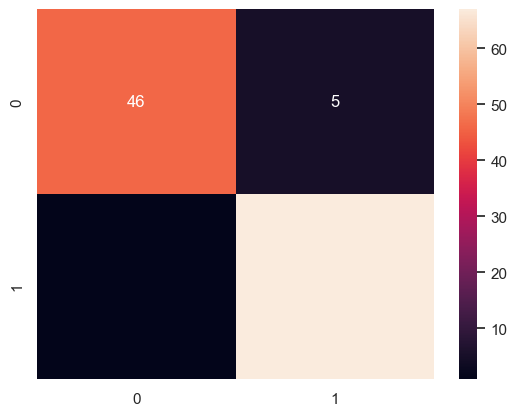

In [78]:
rf_clf = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

rf_clf.fit(X_train, y_train)

y_rf = rf_clf.predict(X_test)

print(classification_report(y_rf, y_test, digits=4))

sns.heatmap(confusion_matrix(y_rf, y_test), annot=True)
plt.show()

              precision    recall  f1-score   support

           0     0.9787    0.9388    0.9583        49
           1     0.9583    0.9857    0.9718        70

    accuracy                         0.9664       119
   macro avg     0.9685    0.9622    0.9651       119
weighted avg     0.9667    0.9664    0.9663       119



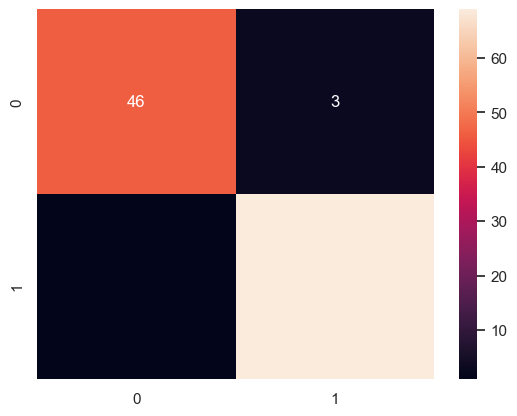

In [81]:
xgb_clf = xgb.XGBClassifier(colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, 
                            max_depth=5, n_estimators=200, subsample=0.8)

xgb_clf.fit(X_train, y_train)

y_xgb = xgb_clf.predict(X_test)

print(classification_report(y_xgb, y_test, digits=4))

sns.heatmap(confusion_matrix(y_xgb, y_test), annot=True)
plt.show()